# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [2]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [124]:
class walker:

    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)
 
    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions[0]=0
        for i in range (n):
            positions[i+1]=positions[i]+self.possibleSteps[numpy.random.choice(range(self.npossible))]
        return positions

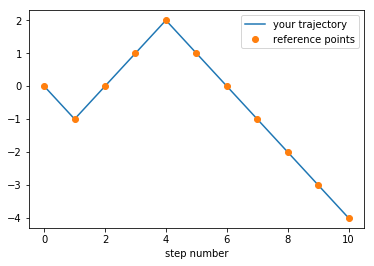

In [125]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

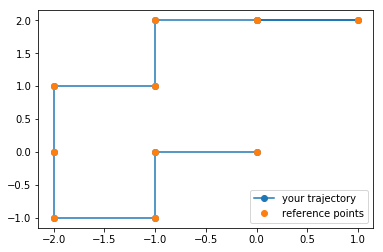

In [126]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

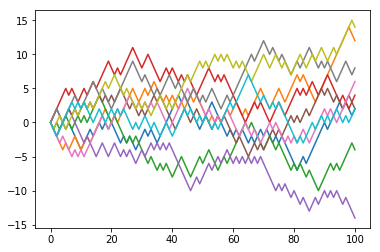

In [137]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


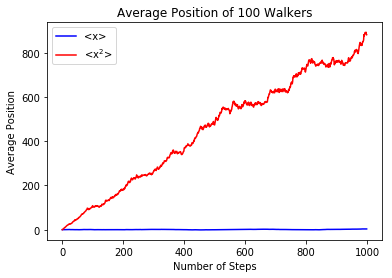

In [207]:
nsteps = 1000
ndim = 1
nwalkers = 100

c=[]
y=[]
x=[]

for i in range(nwalkers):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    c.append(ys)

    
for i in range (nsteps):
    v=[]
    x.append(i)
    for j in range (nwalkers):
        v.append((c[j][i]))
    y.append(numpy.average(v))
    
y2=[]
x2=[]
    
for i in range (nsteps):
    v2=[]
    x2.append(i)
    for j in range (nwalkers):
        v2.append((c[j][i])**2)
    y2.append(numpy.average(v2))
    

plt.plot(x,y,color='blue', label='<x>')
plt.plot(x2,y2,color='red',label='<x$^2$>')
plt.xlabel('Number of Steps')
plt.ylabel('Average Position')
plt.title('Average Position of 100 Walkers')
plt.legend(loc='upper left')

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[1.0, 19.000001507964953, 16.999999178288135, 5.00000014682206, 12.999999764661197, 5.00000014682206, 1.0, 12.999999764661197, 2.999999892310612, 5.00000014682206, 1.0, 19.000001507964953, 11.000000593554034, 5.00000014682206, 5.00000014682206, 44.99999812267765, 25.0, 11.000000593554034, 9.0, 21.000000944733074, 2.999999892310612, 9.0, 16.999999178288135, 5.00000014682206, 2.999999892310612, 11.000000593554034, 1.0, 1.0, 16.999999178288135, 19.000001507964953, 5.00000014682206, 5.00000014682206, 16.999999178288135, 9.0, 11.000000593554034, 32.99999976271488, 12.999999764661197, 2.999999892310612, 5.00000014682206, 11.000000593554034, 9.0, 5.00000014682206, 19.000001507964953, 1.0, 11.000000593554034, 35.000002542929224, 9.0, 5.00000014682206, 16.999999178288135, 41.000001216531246, 9.0, 2.999999892310612, 5.00000014682206, 9.0, 19.000001507964953, 28.99999925218276, 11.000000593554034, 1.0, 11.000000593554034, 1.0, 19.000001507964953, 1.0, 5.00000014682206, 5.00000014682206, 1.0, 9.0,

[20.00000058728824, 17.999998372361915, 14.000000813621284, 26.000000141166538, 37.99999908787163, 6.000000436701214, 10.000000242536998, 37.99999908787163, 17.999998372361915, 11.999999569242448, 4.0, 4.0, 14.000000813621284, 20.00000058728824, 14.000000813621284, 30.00000225043209, 24.000001746804855, 16.0, 94.00000909198207, 17.999998372361915, 0.0, 22.00000093244512, 82.00000817632827, 7.999999726171666, 20.00000058728824, 6.000000436701214, 6.000000436701214, 6.000000436701214, 33.999997618971975, 26.000000141166538, 1.9999999315429164, 66.00000473880209, 44.00000237421614, 11.999999569242448, 24.000001746804855, 69.99999617278809, 4.0, 26.000000141166538, 30.00000225043209, 24.000001746804855, 6.000000436701214, 30.00000225043209, 33.999997618971975, 1.9999999315429164, 37.99999908787163, 14.000000813621284, 1.9999999315429164, 17.999998372361915, 30.00000225043209, 86.00000375812306, 36.0, 54.00000042628767, 10.000000242536998, 10.000000242536998, 26.000000141166538, 49.99999997

[44.99999812267765, 16.999999178288135, 26.999997791936266, 52.99999989915909, 41.000001216531246, 1.0, 1.0, 16.999999178288135, 32.99999976271488, 21.000000944733074, 9.0, 16.999999178288135, 41.000001216531246, 25.0, 16.999999178288135, 21.000000944733074, 21.000000944733074, 52.99999989915909, 117.00000819751585, 16.999999178288135, 9.0, 44.99999812267765, 113.00000454708061, 26.999997791936266, 25.0, 12.999999764661197, 11.000000593554034, 5.00000014682206, 21.000000944733074, 12.999999764661197, 2.999999892310612, 51.00000060086154, 11.000000593554034, 21.000000944733074, 21.000000944733074, 122.99999137476334, 11.000000593554034, 16.999999178288135, 35.000002542929224, 9.0, 5.00000014682206, 28.99999925218276, 52.99999989915909, 16.999999178288135, 52.99999989915909, 65.00000029709554, 11.000000593554034, 28.99999925218276, 51.00000060086154, 98.99999110857698, 88.99999640972601, 26.999997791936266, 21.000000944733074, 19.000001507964953, 28.99999925218276, 44.99999812267765, 9.0

[56.99999722367011, 51.00000060086154, 58.999998773492734, 35.000002542929224, 52.99999989915909, 16.999999178288135, 11.000000593554034, 49.0, 28.99999925218276, 21.000000944733074, 19.000001507964953, 25.0, 35.000002542929224, 16.999999178288135, 41.000001216531246, 28.99999925218276, 26.999997791936266, 66.99999269157706, 122.99999137476334, 25.0, 21.000000944733074, 41.000001216531246, 105.00000691158584, 68.99999328732156, 84.99999914097225, 51.00000060086154, 28.99999925218276, 9.0, 41.000001216531246, 32.99999976271488, 35.000002542929224, 37.00000228593217, 9.0, 21.000000944733074, 2.999999892310612, 121.0, 12.999999764661197, 37.00000228593217, 21.000000944733074, 11.000000593554034, 5.00000014682206, 9.0, 35.000002542929224, 28.99999925218276, 75.00000763159278, 25.0, 9.0, 52.99999989915909, 32.99999976271488, 105.00000691158584, 109.00000322819778, 76.9999990380611, 49.0, 12.999999764661197, 9.0, 115.00000284797807, 26.999997791936266, 28.99999925218276, 117.00000819751585, 

[33.999997618971975, 121.99999001495598, 82.00000817632827, 36.0, 110.00000264481423, 26.000000141166538, 37.99999908787163, 56.00000325448514, 49.99999997444684, 47.99999827696979, 26.000000141166538, 86.00000375812306, 26.000000141166538, 71.99999348944766, 17.999998372361915, 17.999998372361915, 44.00000237421614, 44.00000237421614, 173.99998978261374, 44.00000237421614, 46.00000071944328, 30.00000225043209, 110.00000264481423, 40.000000970147994, 86.00000375812306, 80.00000234915296, 54.00000042628767, 49.99999997444684, 89.99999313548415, 37.99999908787163, 17.999998372361915, 33.999997618971975, 10.000000242536998, 22.00000093244512, 1.9999999315429164, 88.00000372978047, 82.00000817632827, 37.99999908787163, 26.000000141166538, 24.000001746804855, 37.99999908787163, 31.999998904686663, 41.999998039865204, 30.00000225043209, 80.00000234915296, 30.00000225043209, 6.000000436701214, 89.99999313548415, 77.99999187771755, 98.00000372627346, 110.00000264481423, 89.99999313548415, 89.9

[44.99999812267765, 219.000007318813, 161.00000283026384, 42.99999802311163, 105.00000691158584, 16.999999178288135, 49.0, 68.99999328732156, 28.99999925218276, 19.000001507964953, 65.00000029709554, 58.999998773492734, 25.0, 82.99999998810017, 9.0, 21.000000944733074, 41.000001216531246, 65.00000029709554, 201.00001248389253, 42.99999802311163, 52.99999989915909, 19.000001507964953, 161.00000283026384, 117.00000819751585, 117.00000819751585, 144.9999982303134, 25.0, 25.0, 72.999995579602, 26.999997791936266, 26.999997791936266, 28.99999925218276, 21.000000944733074, 81.0, 28.99999925218276, 105.00000691158584, 100.99999272948844, 16.999999178288135, 109.00000322819778, 11.000000593554034, 93.00000477578669, 52.99999989915909, 72.999995579602, 58.999998773492734, 82.99999998810017, 41.000001216531246, 44.99999812267765, 109.00000322819778, 88.99999640972601, 100.99999272948844, 148.99999391582332, 81.0, 98.99999110857698, 21.000000944733074, 105.00000691158584, 105.00000691158584, 44.9

[51.00000060086154, 124.99999833934999, 380.99996315667886, 49.0, 109.00000322819778, 26.999997791936266, 42.99999802311163, 146.9999918325484, 5.00000014682206, 52.99999989915909, 121.0, 61.00000202353863, 81.0, 106.99999045292861, 21.000000944733074, 68.99999328732156, 26.999997791936266, 88.99999640972601, 261.000008676725, 41.000001216531246, 84.99999914097225, 41.000001216531246, 106.99999045292861, 185.00001192931086, 173.00000089971581, 129.0000001037297, 28.99999925218276, 25.0, 109.00000322819778, 51.00000060086154, 58.999998773492734, 26.999997791936266, 51.00000060086154, 76.9999990380611, 41.000001216531246, 155.00000187926707, 100.99999272948844, 26.999997791936266, 117.00000819751585, 25.0, 68.99999328732156, 61.00000202353863, 88.99999640972601, 58.999998773492734, 72.999995579602, 32.99999976271488, 26.999997791936266, 129.0000001037297, 65.00000029709554, 98.99999110857698, 205.0000125827646, 88.99999640972601, 82.99999998810017, 52.99999989915909, 179.00000646303033, 

[81.0, 100.99999272948844, 395.0000068301015, 61.00000202353863, 97.00000153332076, 61.00000202353863, 16.999999178288135, 124.99999833934999, 16.999999178288135, 52.99999989915909, 88.99999640972601, 44.99999812267765, 84.99999914097225, 165.0000098881801, 28.99999925218276, 82.99999998810017, 21.000000944733074, 115.00000284797807, 226.99998825564762, 16.999999178288135, 109.00000322819778, 52.99999989915909, 61.00000202353863, 131.0000027415308, 165.0000098881801, 100.99999272948844, 12.999999764661197, 44.99999812267765, 65.00000029709554, 82.99999998810017, 72.999995579602, 56.99999722367011, 106.99999045292861, 61.00000202353863, 35.000002542929224, 176.99999130565266, 105.00000691158584, 12.999999764661197, 81.0, 12.999999764661197, 56.99999722367011, 129.0000001037297, 117.00000819751585, 105.00000691158584, 93.00000477578669, 61.00000202353863, 12.999999764661197, 148.99999391582332, 100.99999272948844, 88.99999640972601, 336.999979932094, 100.99999272948844, 75.00000763159278

[86.00000375812306, 134.00000538333643, 382.0000195381908, 51.99999905864479, 134.00000538333643, 33.999997618971975, 22.00000093244512, 115.99999700873104, 6.000000436701214, 71.99999348944766, 120.00000900172836, 14.000000813621284, 145.99999965872848, 145.99999965872848, 58.00000144889873, 98.00000372627346, 16.0, 113.99999989406206, 271.99998685261016, 14.000000813621284, 110.00000264481423, 14.000000813621284, 113.99999989406206, 120.00000900172836, 131.99999905085951, 98.00000372627346, 26.000000141166538, 67.99999671315254, 61.999997289167595, 121.99999001495598, 101.99999055621811, 49.99999997444684, 24.000001746804855, 54.00000042628767, 36.0, 301.9999975066312, 86.00000375812306, 61.999997289167595, 61.999997289167595, 10.000000242536998, 67.99999671315254, 113.99999989406206, 89.99999313548415, 86.00000375812306, 115.99999700873104, 115.99999700873104, 16.0, 229.99998833562495, 98.00000372627346, 74.0000029662624, 342.0000094273746, 54.00000042628767, 96.00000698721942, 20.0

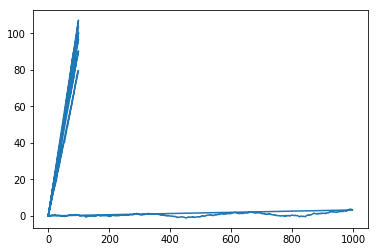

In [215]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

y1=[]
x1=[]
y2=[]
x2=[]
y3=[]
x3=[]
y4=[]
x4=[]

c=[]

for i in range(nwalkers):
    w = walker(numpy.zeros(3),ndim=3)
    ys = w.doSteps(nsteps)
    c.append(ys)


for i in range (nsteps):
    v=[]
    x.append(i)
    for j in range (nwalkers):
        v.append((numpy.linalg.norm((c[j][i]))**2))
    print (v)
    y.append(numpy.average(v))

plt.plot(x,y)

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


In [ ]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))
for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.1)